## Contours

Contours can be defined as a curve joining the continous points(along the boundary), having the same color or intensity.

Point to be noted:

**For better accuracy use binary images, so before finding contours apply threshold or canny edge detection.**


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Highway')

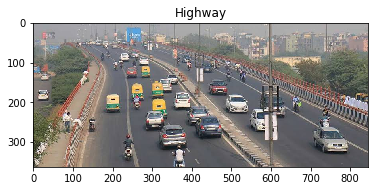

In [2]:
image = cv.imread('pics/road.jpeg')
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Highway")

So the drill is simple:

1. Find the contours with the help of `cv2.findContours()`
2. Then draw those contours on the image with the help of `cv2.drawContours()`

Number of contours foundin canny = 2381
Number of contours found in threshold = 2778


Text(0.5, 1, 'Contours with threshold')

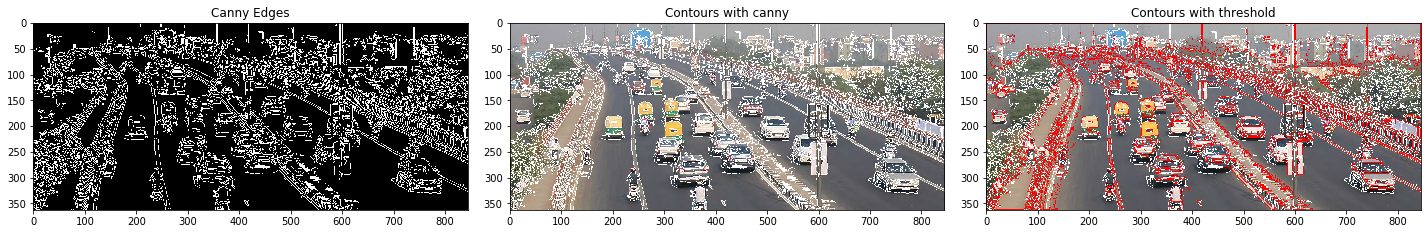

In [3]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.tight_layout()

## Canny
edge = cv.Canny(gray_image, 30, 200)
ax[0].imshow(cv.cvtColor(edge, cv.COLOR_RGB2BGR))
ax[0].set_title("Canny Edges")

## Finding contours
contours, hierarchy = cv.findContours(edge.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours foundin canny = {}".format(len(contours)))

## Draw the contours
cv.drawContours(image, contours, -1, (255, 255, 255, 3))
ax[1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[1].set_title("Contours with canny")

## Binary threshold
ret, threshold = cv.threshold(gray_image, 127, 255, 3)
contours_2, hierarchy = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours found in threshold = {}".format(len(contours_2)))

## Draw the contours
cv.drawContours(image, contours_2, -1, (0, 0, 255, 3))
ax[2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[2].set_title("Contours with threshold")




## Sorting contours

Text(0.5, 1.0, 'Some shapes')

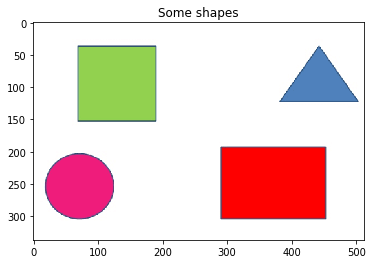

In [4]:
image = cv.imread('pics/shapes.png')
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Some shapes")

Number of contours found in canny = 9


Text(0.5, 1, 'All Contours')

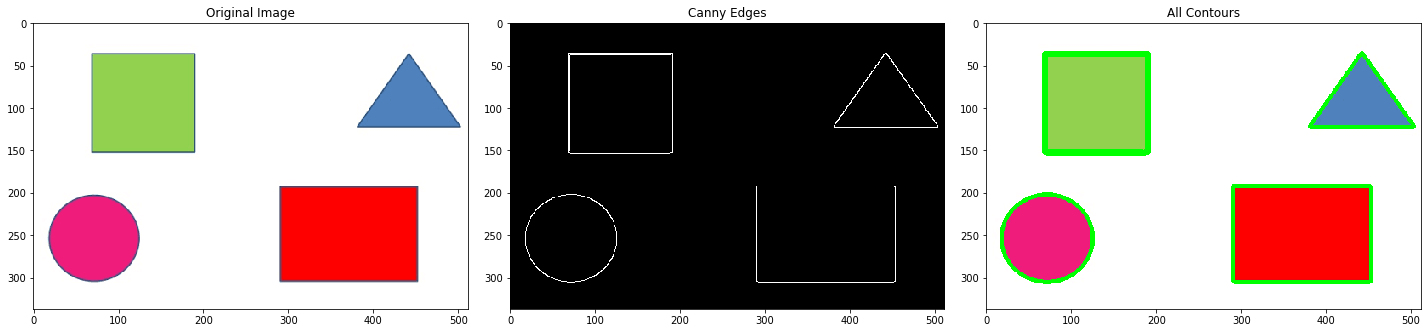

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,200)
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
ax[1].set_title("Canny Edges")

## Finding contours
contours, hierarchy = cv.findContours(edges.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("Number of contours found in canny = {}".format(len(contours)))

## Draw the contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
ax[2].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[2].set_title("All Contours")


## Sort by area

In [6]:
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [7]:
print("Unsorted contours: ", *get_contour_areas(contours))

Unsorted contours:  8627.0 8712.0 18412.5 18415.5 1.0 5388.0 14506.0 5510.0 14508.0


In [8]:
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)

In [9]:
print("Sorted contours: ", *get_contour_areas(sorted_contours))

Sorted contours:  18415.5 18412.5 14508.0 14506.0 8712.0 8627.0 5510.0 5388.0 1.0


In [10]:
image = cv.imread('pics/shapes.png')

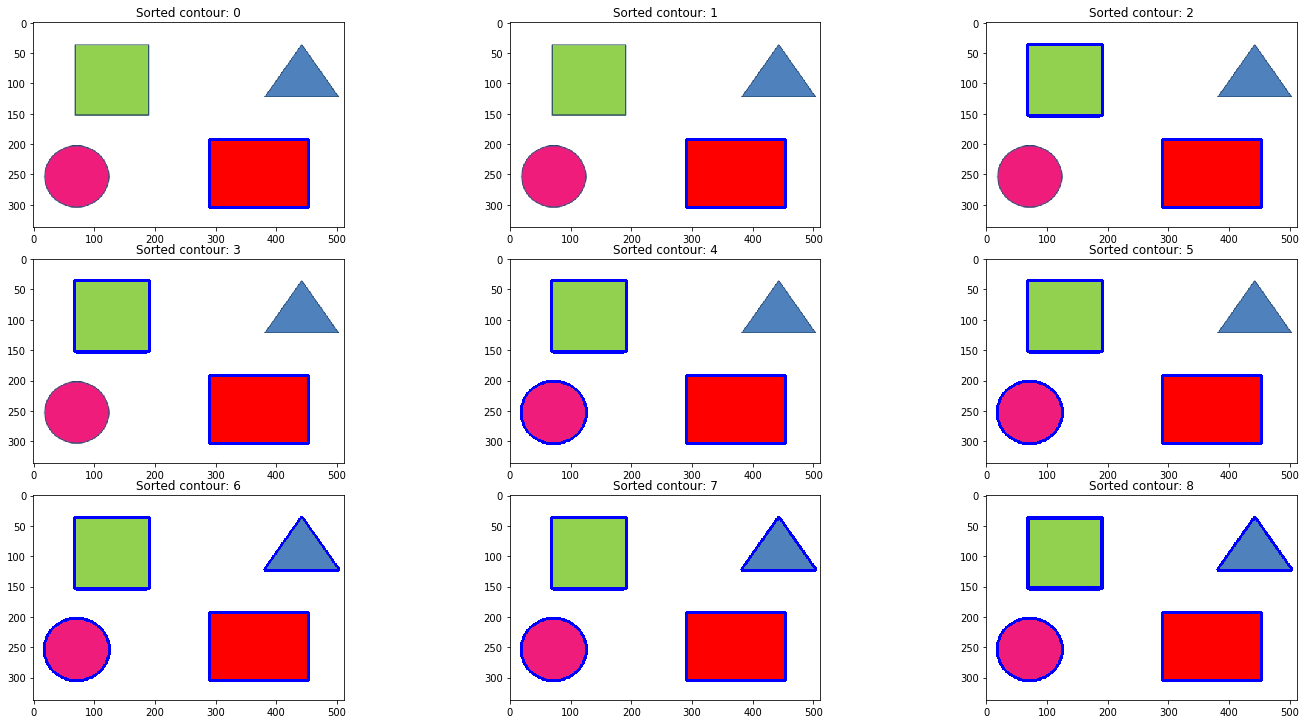

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout()    

count = 0
for k in range(len(sorted_contours)):
    for i in range(3):
        for j in range(3):
            if count <= 8:
                cv.drawContours(image, [sorted_contours[count]], -1, (255, 0, 0), 3)
                ax[i][j].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
                ax[i][j].set_title("Sorted contour: {}".format(count))
            count += 1
            

# cv.drawContours(image, [sorted_contours[0]], -1, (255, 0, 0), 3)
# ax[0][0].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[0][0].set_title("Sorted contour: 1")

# cv.drawContours(image, [sorted_contours[1]], -1, (255, 0, 0), 3)
# ax[0][1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[0][1].set_title("Sorted contour: 2")

# cv.drawContours(image, [sorted_contours[2]], -1, (255, 0, 0), 3)
# ax[0][2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[0][2].set_title("Sorted contour: 3")

# cv.drawContours(image, [sorted_contours[3]], -1, (255, 0, 0), 3)
# ax[1][0].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[1][0].set_title("Sorted contour: 4")

# cv.drawContours(image, [sorted_contours[4]], -1, (255, 0, 0), 3)
# ax[1][1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[1][1].set_title("Sorted contour: 5")

# cv.drawContours(image, [sorted_contours[5]], -1, (255, 0, 0), 3)
# ax[1][2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[1][2].set_title("Sorted contour: 6")

# cv.drawContours(image, [sorted_contours[6]], -1, (255, 0, 0), 3)
# ax[2][0].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[2][0].set_title("Sorted contour: 7")

# cv.drawContours(image, [sorted_contours[7]], -1, (255, 0, 0), 3)
# ax[2][1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[2][1].set_title("Sorted contour: 8")

# cv.drawContours(image, [sorted_contours[8]], -1, (255, 0, 0), 3)
# ax[2][2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
# ax[2][2].set_title("Sorted contour: 9")

In [14]:
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # Draw the countour number on the image
    cv.circle(image,(cx,cy), 10, (255,0,255), -1)

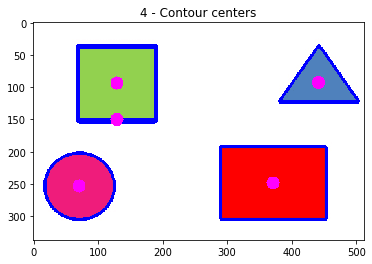

In [15]:
for (i, c) in enumerate(contours):
    label_contour_center(image, c)

plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("4 - Contour centers")
plt.show()